# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from tabulate import tabulate
from sklearn.model_selection import train_test_split

# Reading the diabetes dataset file

In [2]:
data = pd.read_csv('diabetes.csv',header=None)

In [3]:
data.shape

(759, 9)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [5]:
# check for null and na values
data.isnull().sum().sum()

0

In [6]:
data.isna().sum().sum()
# no na values

0

In [7]:
# check for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       759 non-null    float64
 1   1       759 non-null    float64
 2   2       759 non-null    float64
 3   3       759 non-null    float64
 4   4       759 non-null    float64
 5   5       759 non-null    float64
 6   6       759 non-null    float64
 7   7       759 non-null    float64
 8   8       759 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 53.5 KB


In [8]:
# get data statistics
data.describe()

,0,1,2,3,4,5,6,7,8
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X = data.drop(columns=8)

In [10]:
X

,0,1,2,3,4,5,6,7
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...
754,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
755,-0.764706,0.226131,0.147541,-0.454545,0.000000,0.096870,-0.776260,-0.800000
756,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
757,-0.882353,0.266332,-0.016393,0.000000,0.000000,-0.102832,-0.768574,-0.133333


In [11]:
y = data[8]

In [12]:
y

0      0
1      1
2      0
3      1
4      0
      ..
754    1
755    1
756    1
757    0
758    1
Name: 8, Length: 759, dtype: int64

# Basic Data Visualization

**Box plot to check for outlier detection**

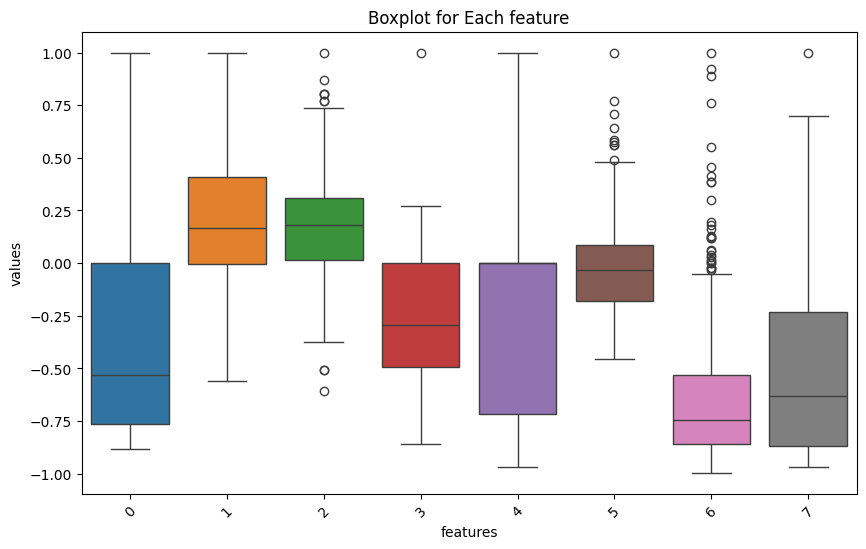

In [15]:
# checking for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title('Boxplot for Each feature')
plt.xlabel('features')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.show()

Feature 6 has a large number of outliers

In [16]:
# change column names from num to str
col_names = ['0','1','2','3','4','5','6','7','8']
data.columns = col_names

In [17]:
# change column names from num to str
col_names = ['0','1','2','3','4','5','6','7']
X.columns = col_names


**Pair plot to check for dependancy between features**

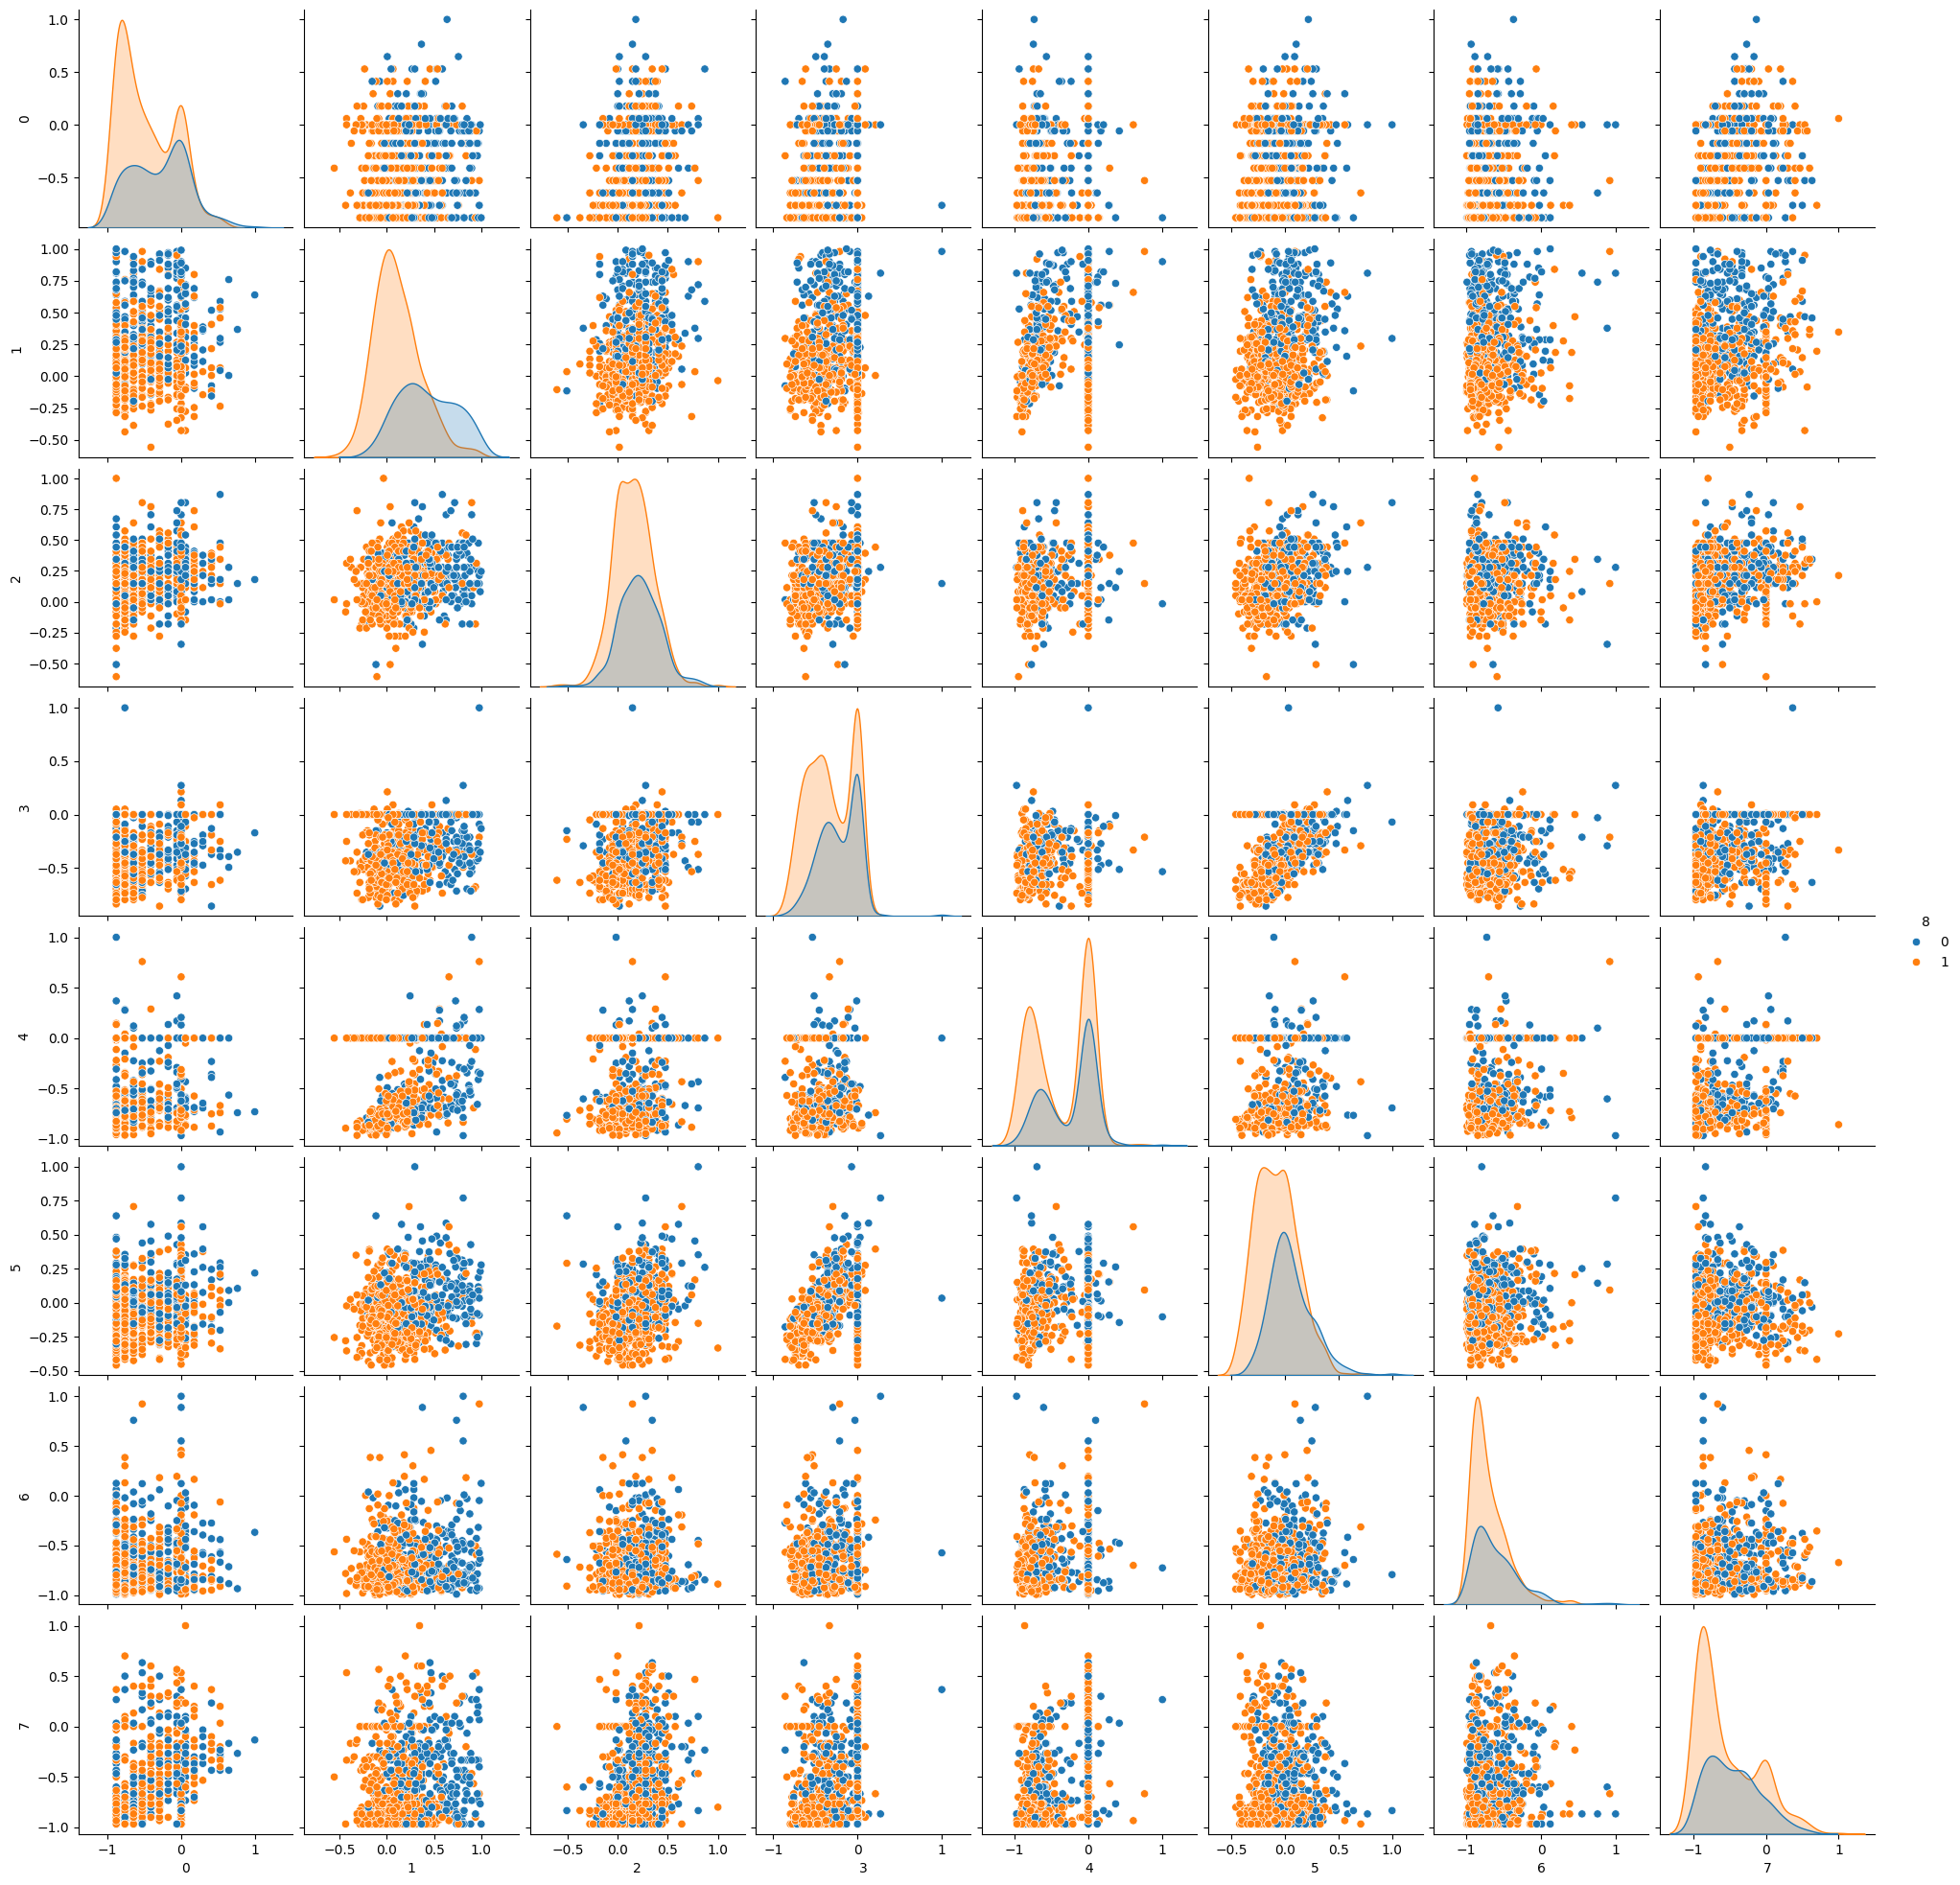

In [18]:
# pair plot to check for dependancy between feature
sns.pairplot(data, hue ='8')

None of the features are highly dependent on each other or with the target variable

**Check for class distribution**

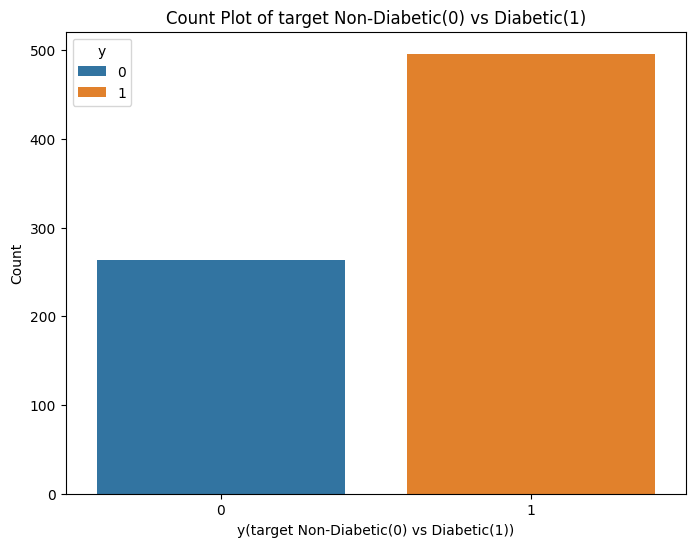

In [19]:
# checking class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='8', hue='8', data=data)
plt.title(f'Count Plot of target Non-Diabetic(0) vs Diabetic(1)')
plt.xlabel('y(target Non-Diabetic(0) vs Diabetic(1))')
plt.ylabel('Count')
plt.legend(title='y', labels=['0', '1'])
plt.show()

Non-Diabetic population is higher than diabetic population

**Correlation analysis**

<Axes: >

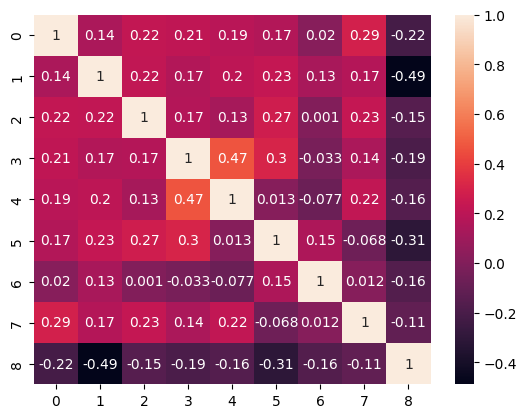

In [20]:
# checking for correlation between features and target
sns.heatmap(data.corr(),annot=True)

Feature 1 has some negative correlation(-0.49) with the target variable

# Splitting data into training and testing in the ratio 80:200

In [100]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((607, 8), (152, 8), (607,), (152,))

# Using Pytorch for classification - Part 2

importing required torch libraries

In [102]:
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm

# converting values to torch tensors

In [103]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Convert numpy array to 2D tensors of pytorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Starting with a linear model

In [104]:
# Create a linear model
linear_model = nn.Sequential(
    nn.Linear(8,1)
)

# A wide model with 3 layers and 32 nodes in hidden layer > 8 input nodes

In [105]:
# wide model
class Wide(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(8, 32)
        self.relu = nn.ReLU()
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Doubling the width

In [106]:
# double width model
class DoubleWide(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(8, 64)
        self.relu = nn.ReLU()
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Deep model with 5 layers but the same number of parameters as wide model

In [107]:
# deep model

class Deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(8, 8)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(8, 8)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(8, 8)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

# Doubling the depth of the deep model with 7 layers

In [108]:
# double deep model
class DoubleDeep(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(8, 8)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(8, 8)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(8, 8)
        self.act3 = nn.ReLU()
        self.layer4 = nn.Linear(8, 8)
        self.act4 = nn.ReLU()
        self.layer5 = nn.Linear(8, 8)
        self.act5 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

# Creating a model train function with forward pass and backward pass and weight updation and accuracy calculation

In [109]:
def model_train(model, X_train, y_train, X_val, y_val, epochs, loss, optimizer):
    # loss function and optimizer
    loss_fn = loss
    if(optimizer=='Adam'):
      optimizer = optim.Adam(model.parameters(), lr=0.0001)
    else:
      optimizer = optim.SGD(model.parameters(), lr=0.0001)

    n_epochs = epochs   # number of epochs to run
    batch_size = 16  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)

    # Hold the best model
    best_acc = - np.inf   # init to negative infinity
    best_weights = None

    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc)
                )
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred = model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())
    # restore model and return best accuracy
    model.load_state_dict(best_weights)
    return best_acc

In [110]:
model_list = list()
loss_list = list()
optimizer_list = list()
epochs_list = list()
accuracy_list = list()

# Loop through different models, loss functions, optimizers and epochs and tabulate the accuracies

In [ ]:
# choose 1 for Adam optimizer and 2 for SGD optimizer
models = [linear_model, Wide(), DoubleWide(), Deep(), DoubleDeep()]
loss = [nn.HingeEmbeddingLoss(), nn.BCEWithLogitsLoss()]
optimizer = ['Adam', 'SGD']
epochs = [10, 50, 100, 200]

for loss_func in loss:
  for optimize in optimizer:
    for epoch in epochs:
      for model in models:
        acc = model_train(model, X_train, y_train, X_test, y_test, epoch, loss_func, optimize)
        model_list.append(model.__class__.__name__)
        loss_list.append(loss_func)
        optimizer_list.append(optimize)
        epochs_list.append(epoch)
        accuracy_list.append(round(acc, 2))


hyperparam_acc_list = pd.DataFrame({'model':model_list, 'loss':loss_list, 'optimizer':optimizer_list, 'epochs':epochs_list, 'accuracy':accuracy_list})

In [112]:
print(tabulate(hyperparam_acc_list, headers = 'keys', tablefmt = 'psql'))

+----+------------+----------------------+-------------+----------+------------+
|    | model      | loss                 | optimizer   |   epochs |   accuracy |
|----+------------+----------------------+-------------+----------+------------|
|  0 | Sequential | HingeEmbeddingLoss() | Adam        |       10 |       0.28 |
|  1 | Wide       | HingeEmbeddingLoss() | Adam        |       10 |       0.33 |
|  2 | DoubleWide | HingeEmbeddingLoss() | Adam        |       10 |       0.67 |
|  3 | Deep       | HingeEmbeddingLoss() | Adam        |       10 |       0.67 |
|  4 | DoubleDeep | HingeEmbeddingLoss() | Adam        |       10 |       0.33 |
|  5 | Sequential | HingeEmbeddingLoss() | Adam        |       50 |       0.28 |
|  6 | Wide       | HingeEmbeddingLoss() | Adam        |       50 |       0.33 |
|  7 | DoubleWide | HingeEmbeddingLoss() | Adam        |       50 |       0.67 |
|  8 | Deep       | HingeEmbeddingLoss() | Adam        |       50 |       0.67 |
|  9 | DoubleDeep | HingeEmb

# Conclusion:



*   As the depth of the model increased, the accuracy improved this is because the hidden layers can capture more intricate and complex features. The hidden layers can capture complex relationships
*   Adam optimizer is producing better results than SGD optimizer, this is because Adam converges faster using adaptive learning rate than SGD which is a light weight optimizer
*   As the width of the model increased, the accuracy improved in most of the cases as it helped to define intricate boundaries and may also tend to overfit if its too large

*   As the number of epochs increased the accuracy also improved in most of the cases, this is because as the number of epochs increases the model sees more data and learns the weight to better fit the model
*   BCE with logits loss is giving better accuracy than Hinge embedding loss







# Using Tenserflow for classification - Part 1

In [37]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

In [42]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()

# Linear model

In [90]:
def linear_model_tf():
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.Dense(8, input_shape=(8,), activation='relu'))
 model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 return [model, linear_model_tf.__name__]

# Wide model with 3 layers and 32 nodes in hidden layer > 8 input nodes

In [91]:
def Wide_tf():
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.Dense(8, input_shape=(8,), activation='relu'))
 model.add(tf.keras.layers.Dense(32, activation='relu'))
 model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 return [model, Wide_tf.__name__]

# Doubling the width to 64 nodes in hidden layer

In [92]:
def doubleWide_tf():
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.Dense(8, input_shape=(8,), activation='relu'))
 model.add(tf.keras.layers.Dense(64, activation='relu'))
 model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 return [model,doubleWide_tf.__name__]

# Increasing the depth by retaining the same number of parameters - 5 layers

In [93]:
def Deep_tf():
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.Dense(8, input_shape=(8,), activation='relu'))
 model.add(tf.keras.layers.Dense(8, activation='relu'))
 model.add(tf.keras.layers.Dense(8, activation='relu'))
 model.add(tf.keras.layers.Dense(8, activation='relu'))
 model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 return [model, Deep_tf.__name__]

# Doubling the depth to 7 layers i.e increasing the number of hidden layers

In [94]:
def DoubleDeep_tf():
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.Dense(8, input_shape=(8,), activation='relu'))
 model.add(tf.keras.layers.Dense(8, activation='relu'))
 model.add(tf.keras.layers.Dense(8, activation='relu'))
 model.add(tf.keras.layers.Dense(8, activation='relu'))
 model.add(tf.keras.layers.Dense(8, activation='relu'))
 model.add(tf.keras.layers.Dense(8, activation='relu'))
 model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 return [model, DoubleDeep_tf.__name__]

# Compiling and training model and looping through different nn models, loss functions, optimizers and number of epochs

In [95]:
model_list_tf = list()
loss_list_tf = list()
optimizer_list_tf = list()
epochs_list_tf = list()
accuracy_list_tf = list()

models = [linear_model_tf(), Wide_tf(), doubleWide_tf(), Deep_tf(), DoubleDeep_tf()]
loss = ['hinge', 'binary_crossentropy']
optimizer = ['Adam', 'SGD']
epochs = [10, 50, 100, 200]

for loss_func in loss:
  for optimize in optimizer:
    for epoch in epochs:
      for model in models:
        model_tf = model[0]
        model_tf.compile(loss=loss_func, optimizer=optimize, metrics=['accuracy'])
        history = model_tf.fit(x=X_train, y=y_train, epochs=epoch, validation_data=(X_test, y_test), verbose=0)
        best_model_accuracy = history.history['accuracy'][np.argmin(history.history['loss'])]
        model_list_tf.append(model[1])
        loss_list_tf.append(loss_func)
        optimizer_list_tf.append(optimize)
        epochs_list_tf.append(epoch)
        accuracy_list_tf.append(round(best_model_accuracy, 2))

In [97]:
hyperparam_acc_list_tf = pd.DataFrame({'model':model_list_tf, 'loss':loss_list_tf, 'optimizer':optimizer_list_tf, 'epochs':epochs_list_tf, 'accuracy':accuracy_list_tf})


In [114]:
print(tabulate(hyperparam_acc_list_tf, headers = 'keys', tablefmt = 'psql'))

+----+-----------------+---------------------+-------------+----------+------------+
|    | model           | loss                | optimizer   |   epochs |   accuracy |
|----+-----------------+---------------------+-------------+----------+------------|
|  0 | linear_model_tf | hinge               | Adam        |       10 |       0.65 |
|  1 | Wide_tf         | hinge               | Adam        |       10 |       0.65 |
|  2 | doubleWide_tf   | hinge               | Adam        |       10 |       0.65 |
|  3 | Deep_tf         | hinge               | Adam        |       10 |       0.65 |
|  4 | DoubleDeep_tf   | hinge               | Adam        |       10 |       0.77 |
|  5 | linear_model_tf | hinge               | Adam        |       50 |       0.78 |
|  6 | Wide_tf         | hinge               | Adam        |       50 |       0.81 |
|  7 | doubleWide_tf   | hinge               | Adam        |       50 |       0.8  |
|  8 | Deep_tf         | hinge               | Adam        |     

# Conclusion:



*   As the depth of the model increased, the accuracy improved this is because the hidden layers can capture more intricate and complex features. The hidden layers can capture complex relationships
*   Adam optimizer is producing better results than SGD optimizer, this is because Adam converges faster using adaptive learning rate than SGD which is a light weight optimizer
*   As the width of the model increased, the accuracy improved in most of the cases as it helped to define intricate boundaries and may also tend to overfit if its too large

*   As the number of epochs increased the accuracy also improved in most of the cases, this is because as the number of epochs increases the model sees more data and learns the weight to better fit the model
*   Binary cross entropy gives better accuracy than Hinge loss


*   Overall, Tensor flow models are performing better than Pytorch models in terms of accuracy with similar parameters and this might be because of some internal optimizations. Generally, both tensor flow and pytorch perform equally well.

